# Midterm -- Applied Machine Learning

Josh Gregory

## Canvas Instructions

**Our primary goal is to minimize fraudulent credit card transactions.**

For the Midterm Exam, use the roadmap for building machine learning systems and the sklearn library. You are required to use the original unbalanced dataset (creditcard_small.csv) and the balanced dataset (which you will create). I have reduced the dataset from approximately 300,000 samples to 100,000 samples for efficiency (so you do not have to wait a long time during computation, no step should take more than a few minutes on https://coding.csel.ioLinks to an external site.) . For the same reason, use k = 5 for CV and do not perform pairwise plot. There are 28 anonymized features (V1 - V28). We don't need to understand the features. That is the beauty of ML! It will discern the pattern regardless of what the features mean. Class is a binary label indicating whether the transaction is genuine (0) or fraudulent (1). The features are already scaled, so you do not need to scale them. You are required to  train the 3 algorithms (DT, kNN, SVM) that we have studied in this class. So, in essence you will be performing 6 training runs (2 datasets X 3 algorithms) 

Perform steps 1- 3 of EDA:

1. Performing preliminary checks, creating balanced dataset, identifying and rectifying outliers, missing values and statistics, and creating correlation matrices. [10]

Perform steps 1- 6 of training and testing of 3 algorithms with the 2 datasets:

2. Unbalanced dataset and DT. [10]

3. Unbalanced dataset and kNN. [10]

4. Unbalanced dataset and SVM. [10]

5. Balanced dataset and DT. [10]

6. Balanced dataset and kNN. [10]

7. Balanced dataset and SVM. [10]

Each of these training testing runs must produce a report similar to:

```bash
Classification Report: KNN 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19959
           1       0.86      0.78      0.82        41

    accuracy                           1.00     20000
   macro avg       0.93      0.89      0.91     20000
weighted avg       1.00      1.00      1.00     20000

Training accuracy score of KNN is 99.95
Roc_Auc training score for KNN is 91.2: 
Test accuracy score of KNN is 99.87
Roc_Auc test score for KNN is 78.03: 

[[19951     8]
 [   18    23]]

Accuracy: 0.999
Precision: 0.865
Recall: 0.780
F1: 0.821

k-fold crossvalidation Average:  0.99946999699985
```

8. Create Learning Curves for DT, kNN and SVM [5]

9. Perform a Grid Search (with C and gamma = [0.01, 0.1, 1.0, 10.0] and kernel = ['rbf', 'linear']) and produce best score and parameters (optimal parameters for SVC) for Balanced Dataset [5]

10. Create ROC/AUC curve for the optimal SVC [5]

**Analysis, Observations and Conclusions:**

11. Analyze the correlation: Which top 4 features coorelate to Genuine transactions and which top 4 features coorrelate to Fraudulent transactions? [2.5]

12. Analyze Classification Reports for Unbalanced Dataset: What are you observations? [2.5]

13. Analyze Classification Reports for Balanced Dataset: What are your observations? [2.5]

14. Analyze Classification Reports from Unbalanced Dataset and Balanced Dataset: What are your observations? [2.5]

15. Analyze Learning curves: What do these curves tell us about bias and variance? [2.5]

16. Your overall conclusions and recommendations for meeting the primary goal. [2.5]

**NOTE:** An observation is a meaningful insight. Stating that Sensitivity = TP/FN+TP, although correct, is NOT a meaningful insight [0 points]. Here is an example of a meaningful insight: Our primary goal is to minimize the spread of a communicable disease (COVID-19), thus high sensitivity is desired for tests, and SVC is a better model than DT because it minimizes FN.   

After you have completed Midterm, upload and submit your files.

For notebook assignments, you will always turn in your .ipynb notebook file and an HTML file of the notebook.

For HTML: Click File → Save and Export Notebook As → HTML to make a nice HTML of the notebook.

For .ipynb: Click File → Download

Turn in both the .ipynb and .html files in Canvas.

## EDA Step 1

In [1]:
# importing libraries

import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
import copy
sns.set() 

Read in the dataset and perform preliminary checks:

In [5]:
# Read in the data
df = pd.read_csv('creditcard_small.csv')

classes = pd.unique(df['Class'])
num_classes = len(classes)
each_class = df['Class'].value_counts()

print(classes)
print(num_classes)
print(each_class)

print(df.info())

[0 1]
2
0    99776
1      223
Name: Class, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      99999 non-null  float64
 1   V2      99999 non-null  float64
 2   V3      99999 non-null  float64
 3   V4      99999 non-null  float64
 4   V5      99999 non-null  float64
 5   V6      99999 non-null  float64
 6   V7      99999 non-null  float64
 7   V8      99999 non-null  float64
 8   V9      99999 non-null  float64
 9   V10     99999 non-null  float64
 10  V11     99999 non-null  float64
 11  V12     99999 non-null  float64
 12  V13     99999 non-null  float64
 13  V14     99999 non-null  float64
 14  V15     99999 non-null  float64
 15  V16     99999 non-null  float64
 16  V17     99999 non-null  float64
 17  V18     99999 non-null  float64
 18  V19     99999 non-null  float64
 19  V20     99999 non-null  float64
 20  V21     99999 no

## Answers to questions

### Answers to questions

**What are the names of the features?**
V1-V28.

**What are the types of fetures?**
All of them are continuous

**How many samples do we have?**
There are 99999 samples (0-indexed, so 99998+1 = 99999 total samples from the dataset output)
    
**How many features do we have?**
We have 28 features total

**What are the classes?**
The classes are binary, either genuine (0) or fraudlulet (1) credit card transaction.

**How many classes do we have?**
Two, 0 or 1.
    
    
**How many samples of each class? are they balanced?**
0:    99776
1:      223

Because the genuine class has more than the fraudulent one, these classes are not balanced.

## EDA 2: Check missing values, outliers, and statistics

In [6]:
df.isna().apply(pd.value_counts)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
False,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,...,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999


### Answers to questions

**Are there any missing values?**
No. Since the previous line returned `False`, there are no values that are missing. Therefore, nothing needs to be done.
**Are there anomolies in the statistics?**
Yes. As can be seen in the boxplot below, only the continuous values of Age and Na_to_K are plotted. It would make the most sense to change the features like BP from "NORMAL", "HIGH", and "LOW" to a numerical scheme. I'll do that below the boxplot.

**Are there outliers?**
Yes, in the boxplot below, we can see that there are many outliers. For some of the questions we need to change this 

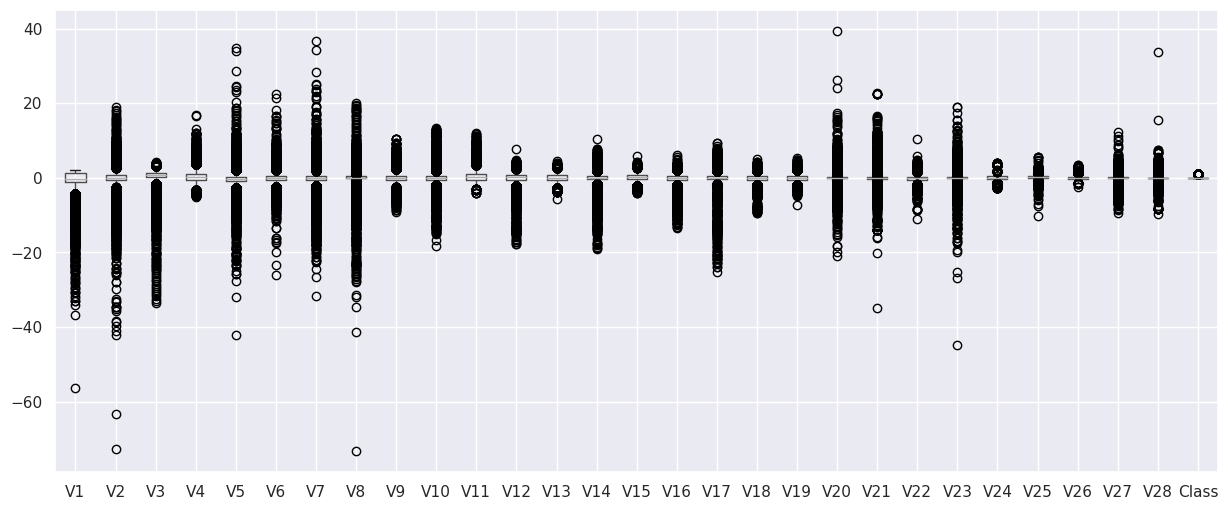

,count,mean,std,min,25%,50%,75%,max
V1,99999.0,-0.262096,1.859057,-56.407510,-1.028101,-0.260556,1.153327,1.960497
V2,99999.0,-0.032374,1.656854,-72.715728,-0.598711,0.078315,0.735736,18.902453
V3,99999.0,0.676251,1.322888,-33.680984,0.176781,0.753991,1.376333,4.226108
V4,99999.0,0.162603,1.349249,-5.172595,-0.711442,0.192567,1.032416,16.715537
V5,99999.0,-0.278507,1.356376,-42.147898,-0.898645,-0.314370,0.249733,34.801666
V6,99999.0,0.094066,1.301356,-26.160506,-0.647870,-0.157022,0.486356,22.529298
V7,99999.0,-0.108712,1.210925,-31.764946,-0.600209,-0.069107,0.414667,36.677268
V8,99999.0,0.056009,1.207528,-73.216718,-0.137457,0.074130,0.360506,20.007208
V9,99999.0,-0.046529,1.121255,-9.283925,-0.698812,-0.119105,0.558226,10.392889
V10,99999.0,-0.023187,1.070409,-18.271168,-0.496342,-0.094927,0.439029,13.249433


In [7]:
df.boxplot(figsize = (15,6))
plt.show()
df.describe().T

Setting the outliers above the 75th percentile equal to the 75th percentile, and the outliers below the 25th percentile equal to the 25th percentile:

In [14]:
# Loop through each column
for column in df.columns-1:
    # Calculate the 25th and 75th percentiles
    lower_bound = df[column].quantile(0.25)
    upper_bound = df[column].quantile(0.75)
    
    # Set the values according to the description in the above cell
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

TypeError: unsupported operand type(s) for -: 'str' and 'int'

Loop through each column and plot a histogramfor column in df.columns:
    plt.figure(figsize=(8, 4))
    plt.hist(df[column], bins=10, edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(axis='y')
    plt.show()

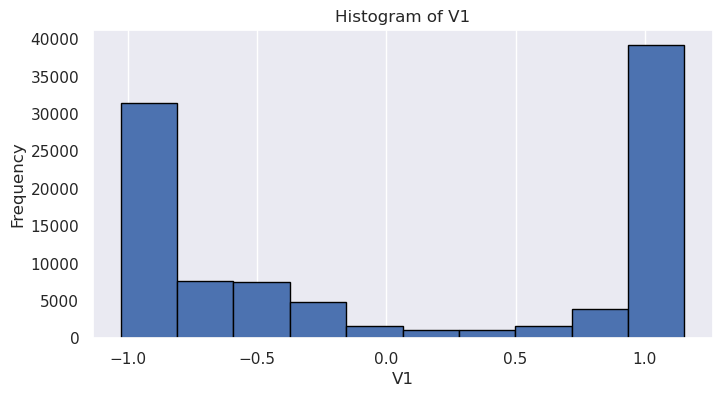

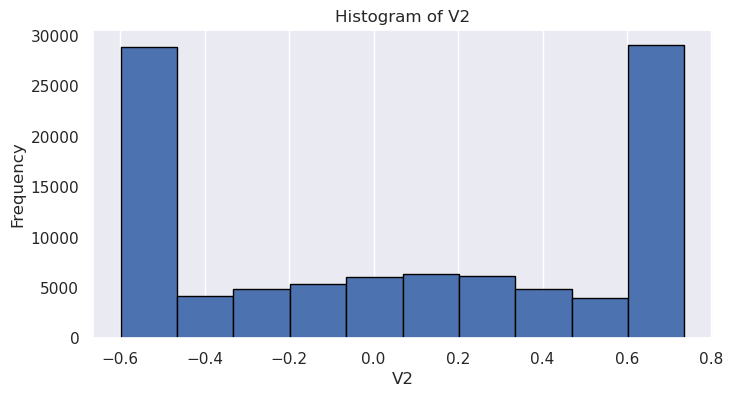

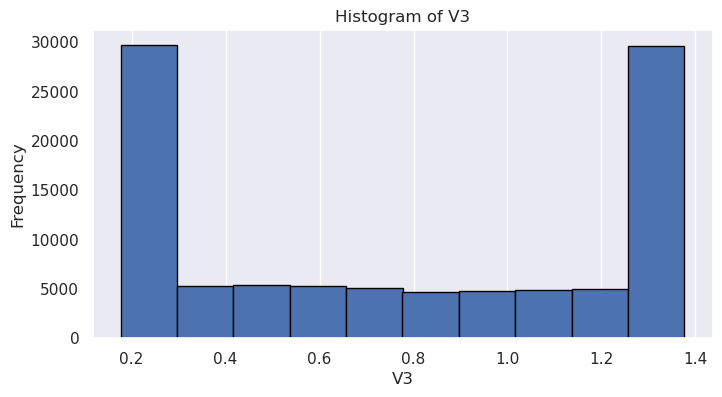

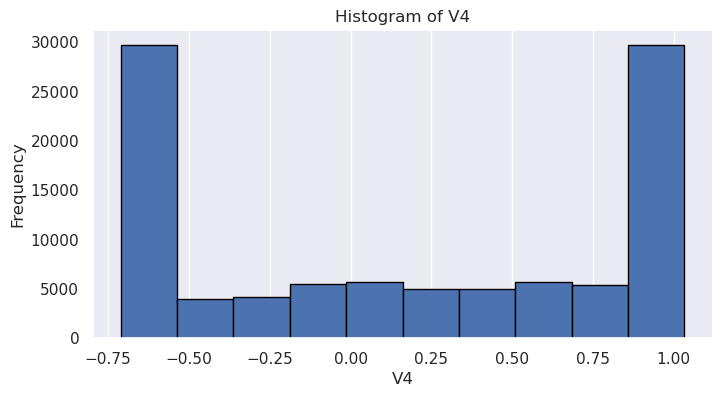

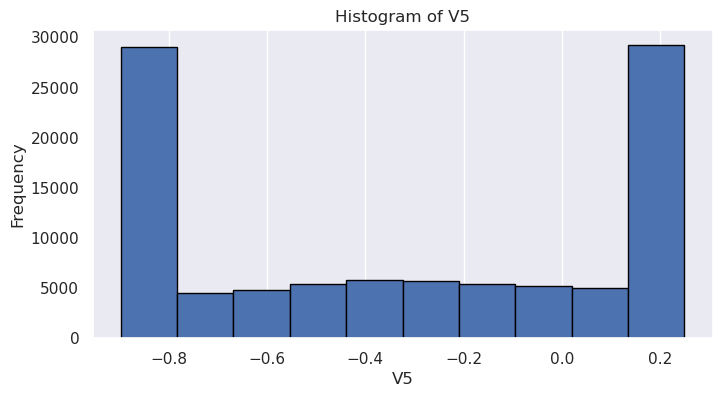

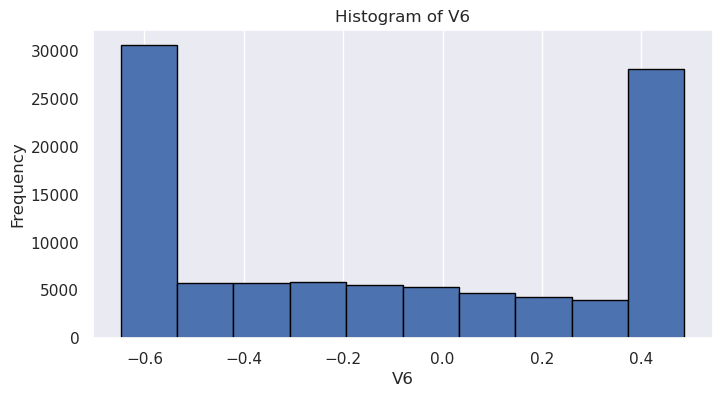

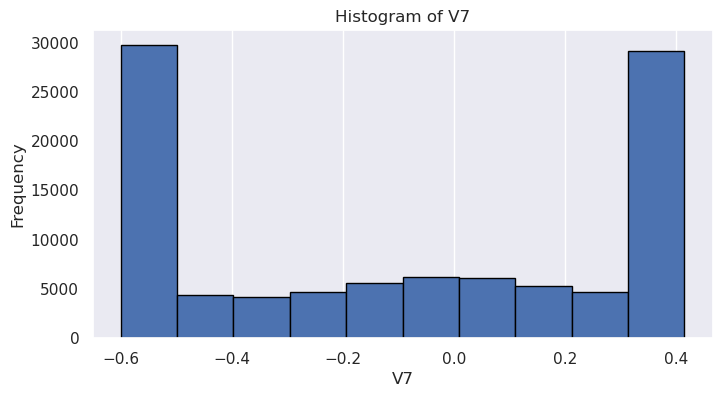

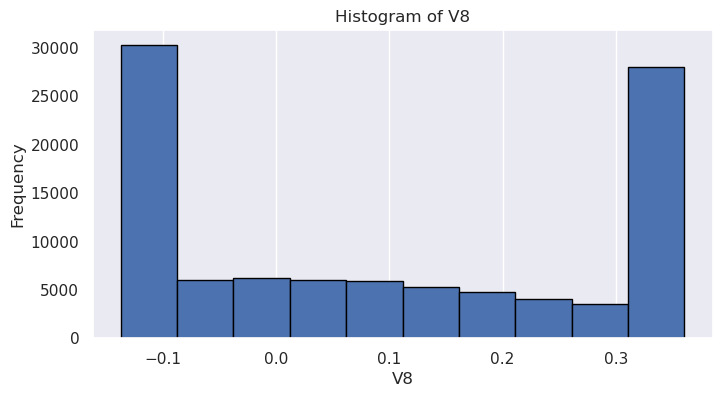

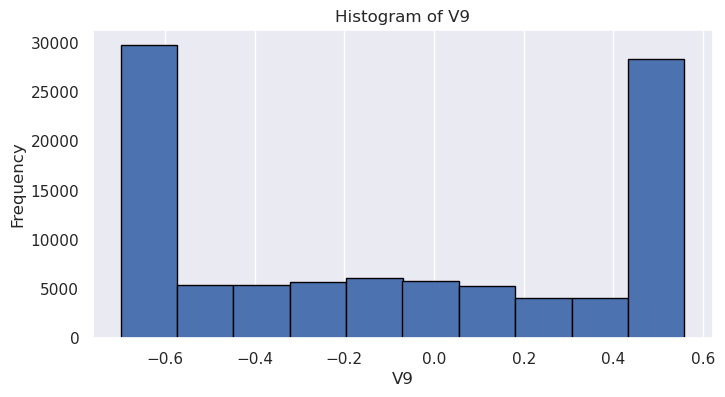

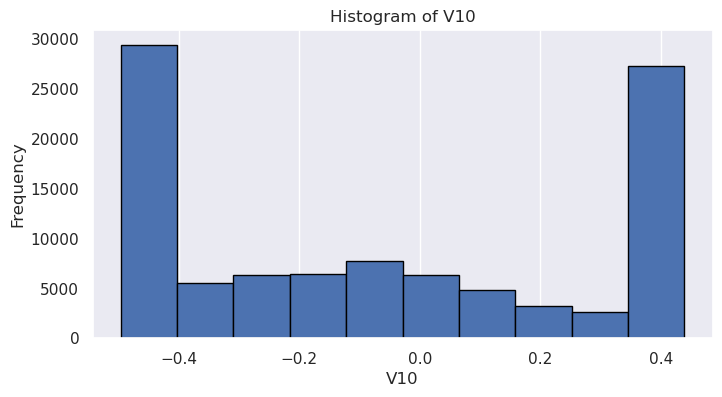

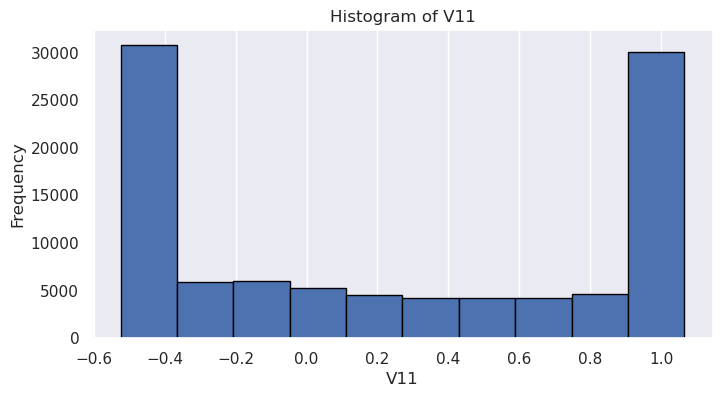

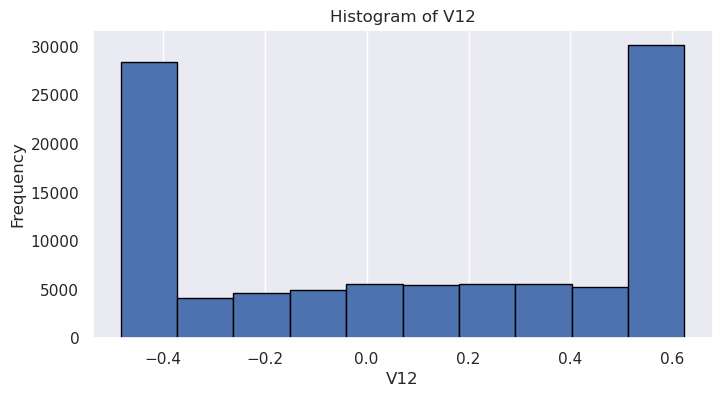

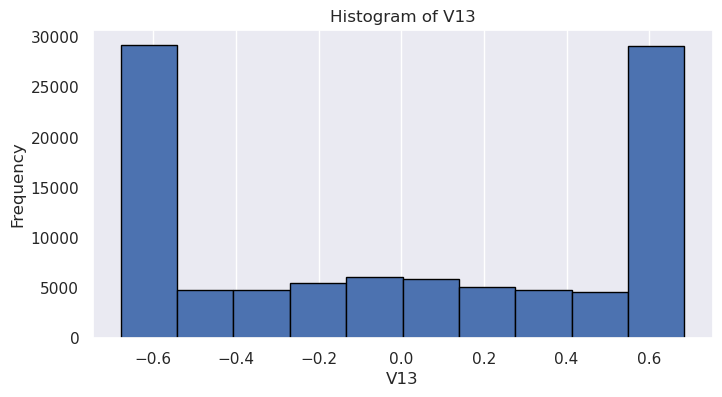

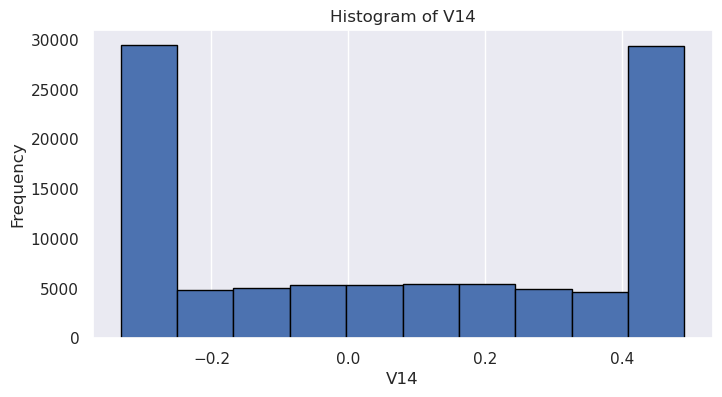

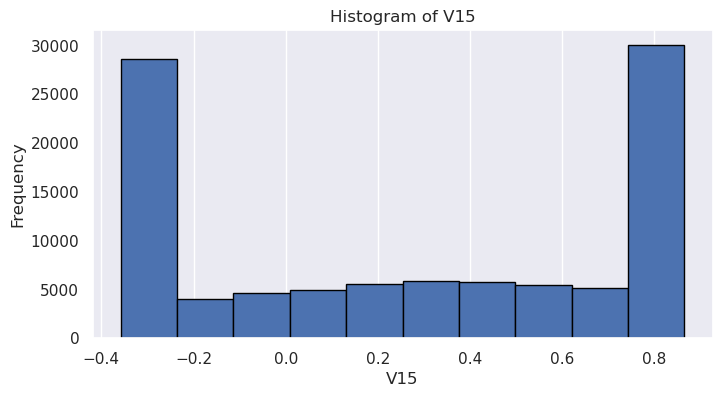

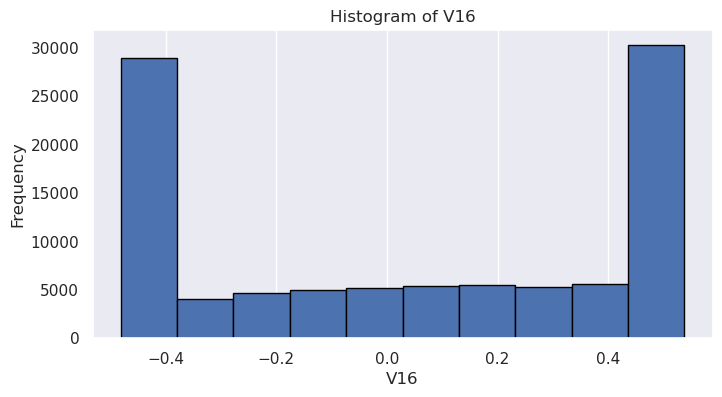

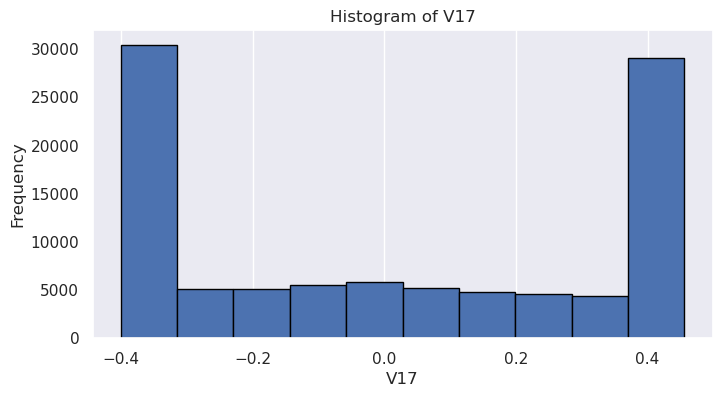

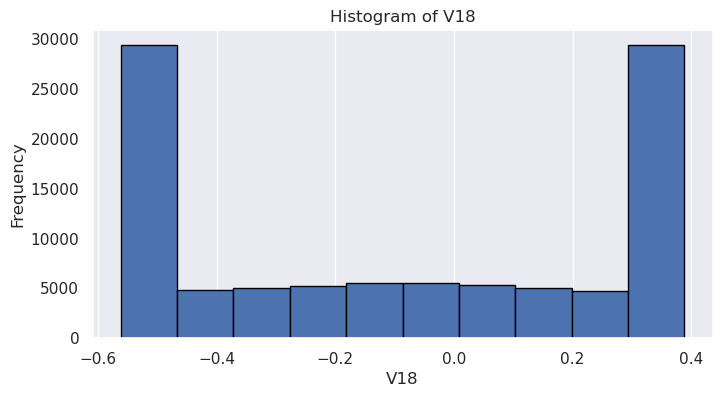

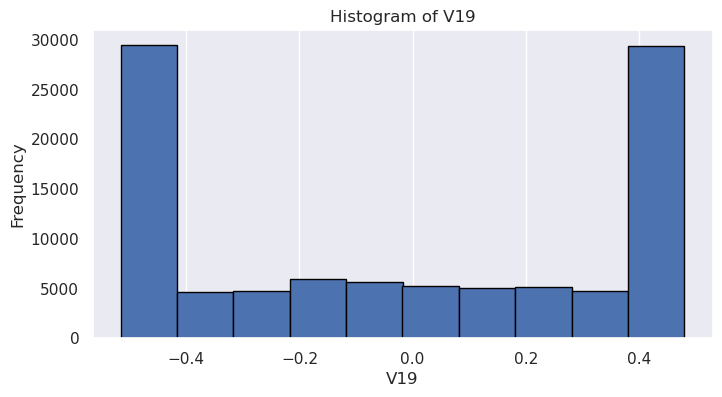

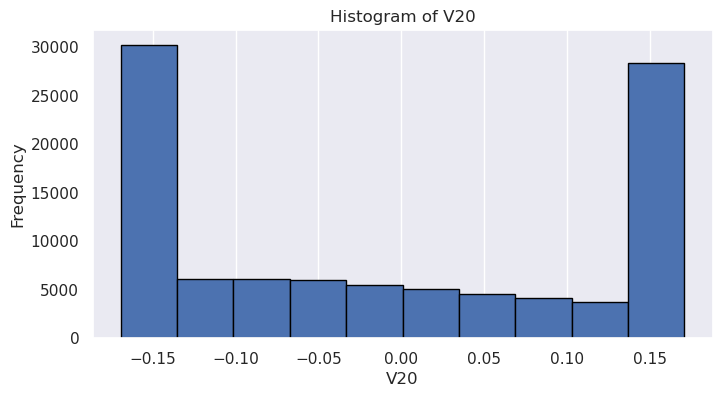

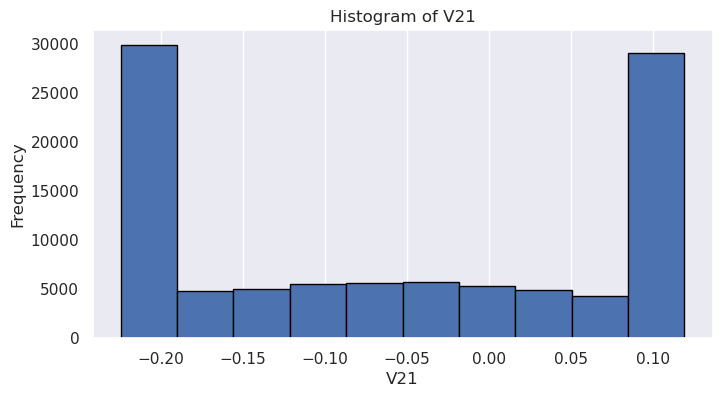

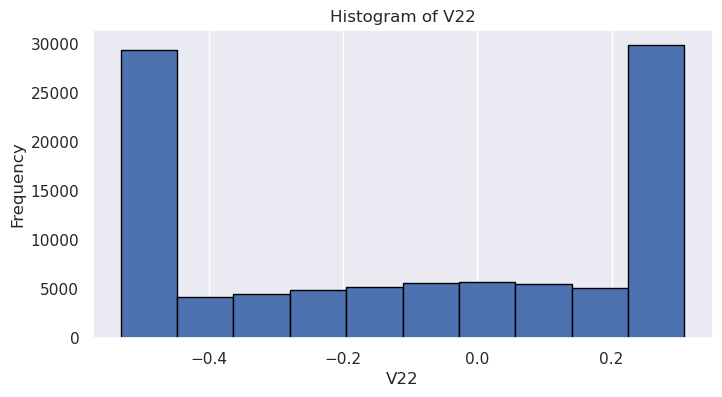

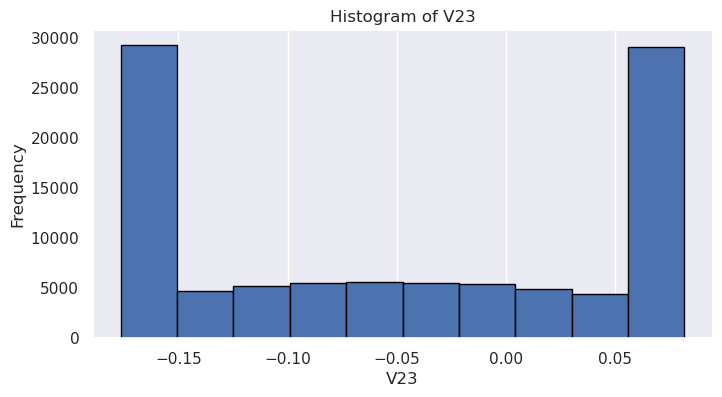

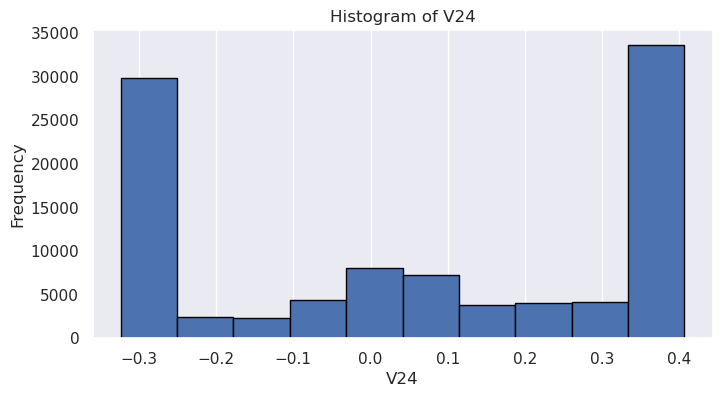

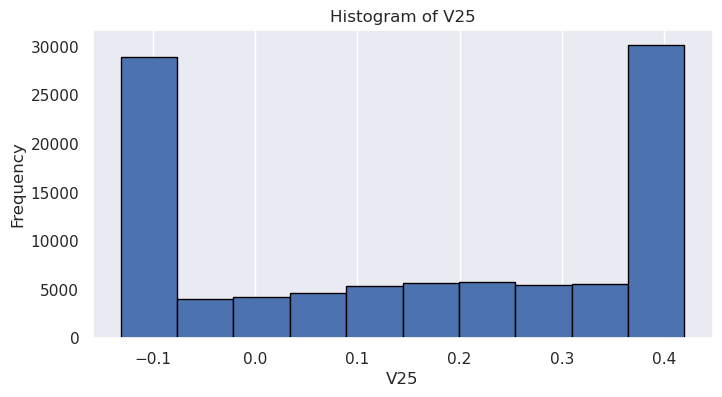

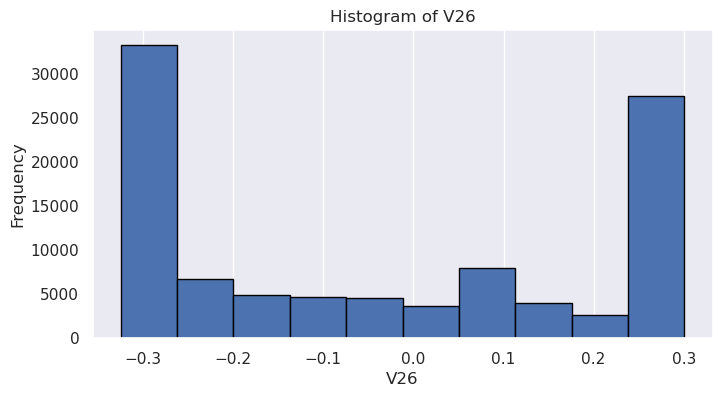

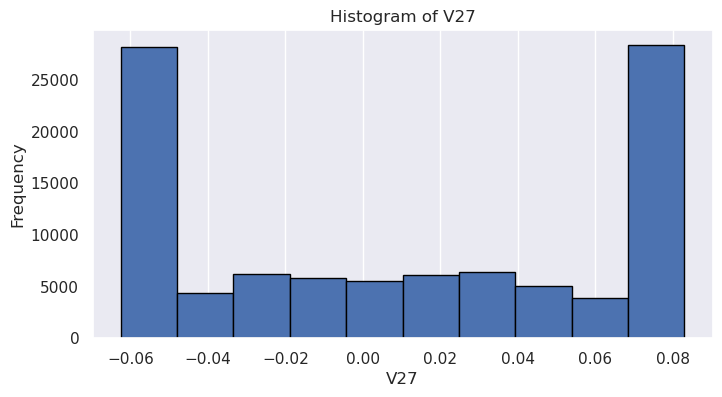

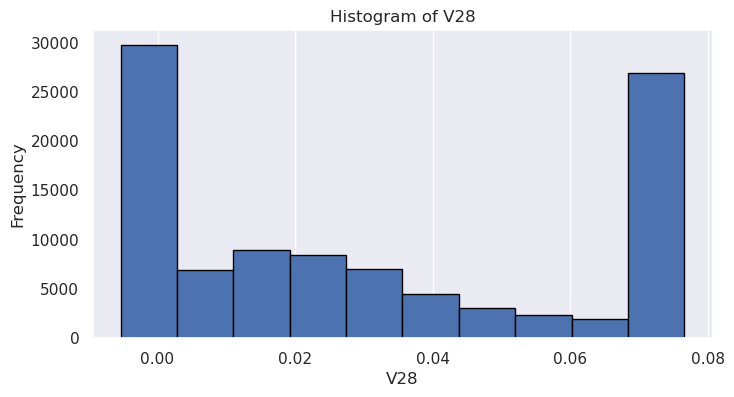

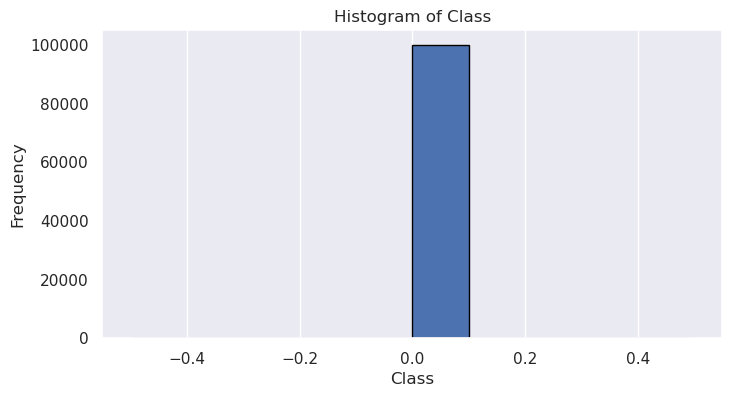

In [13]:
for column in df.columns:
    plt.figure(figsize=(8, 4))
    plt.hist(df[column], bins=10, edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(axis='y')
    plt.show()

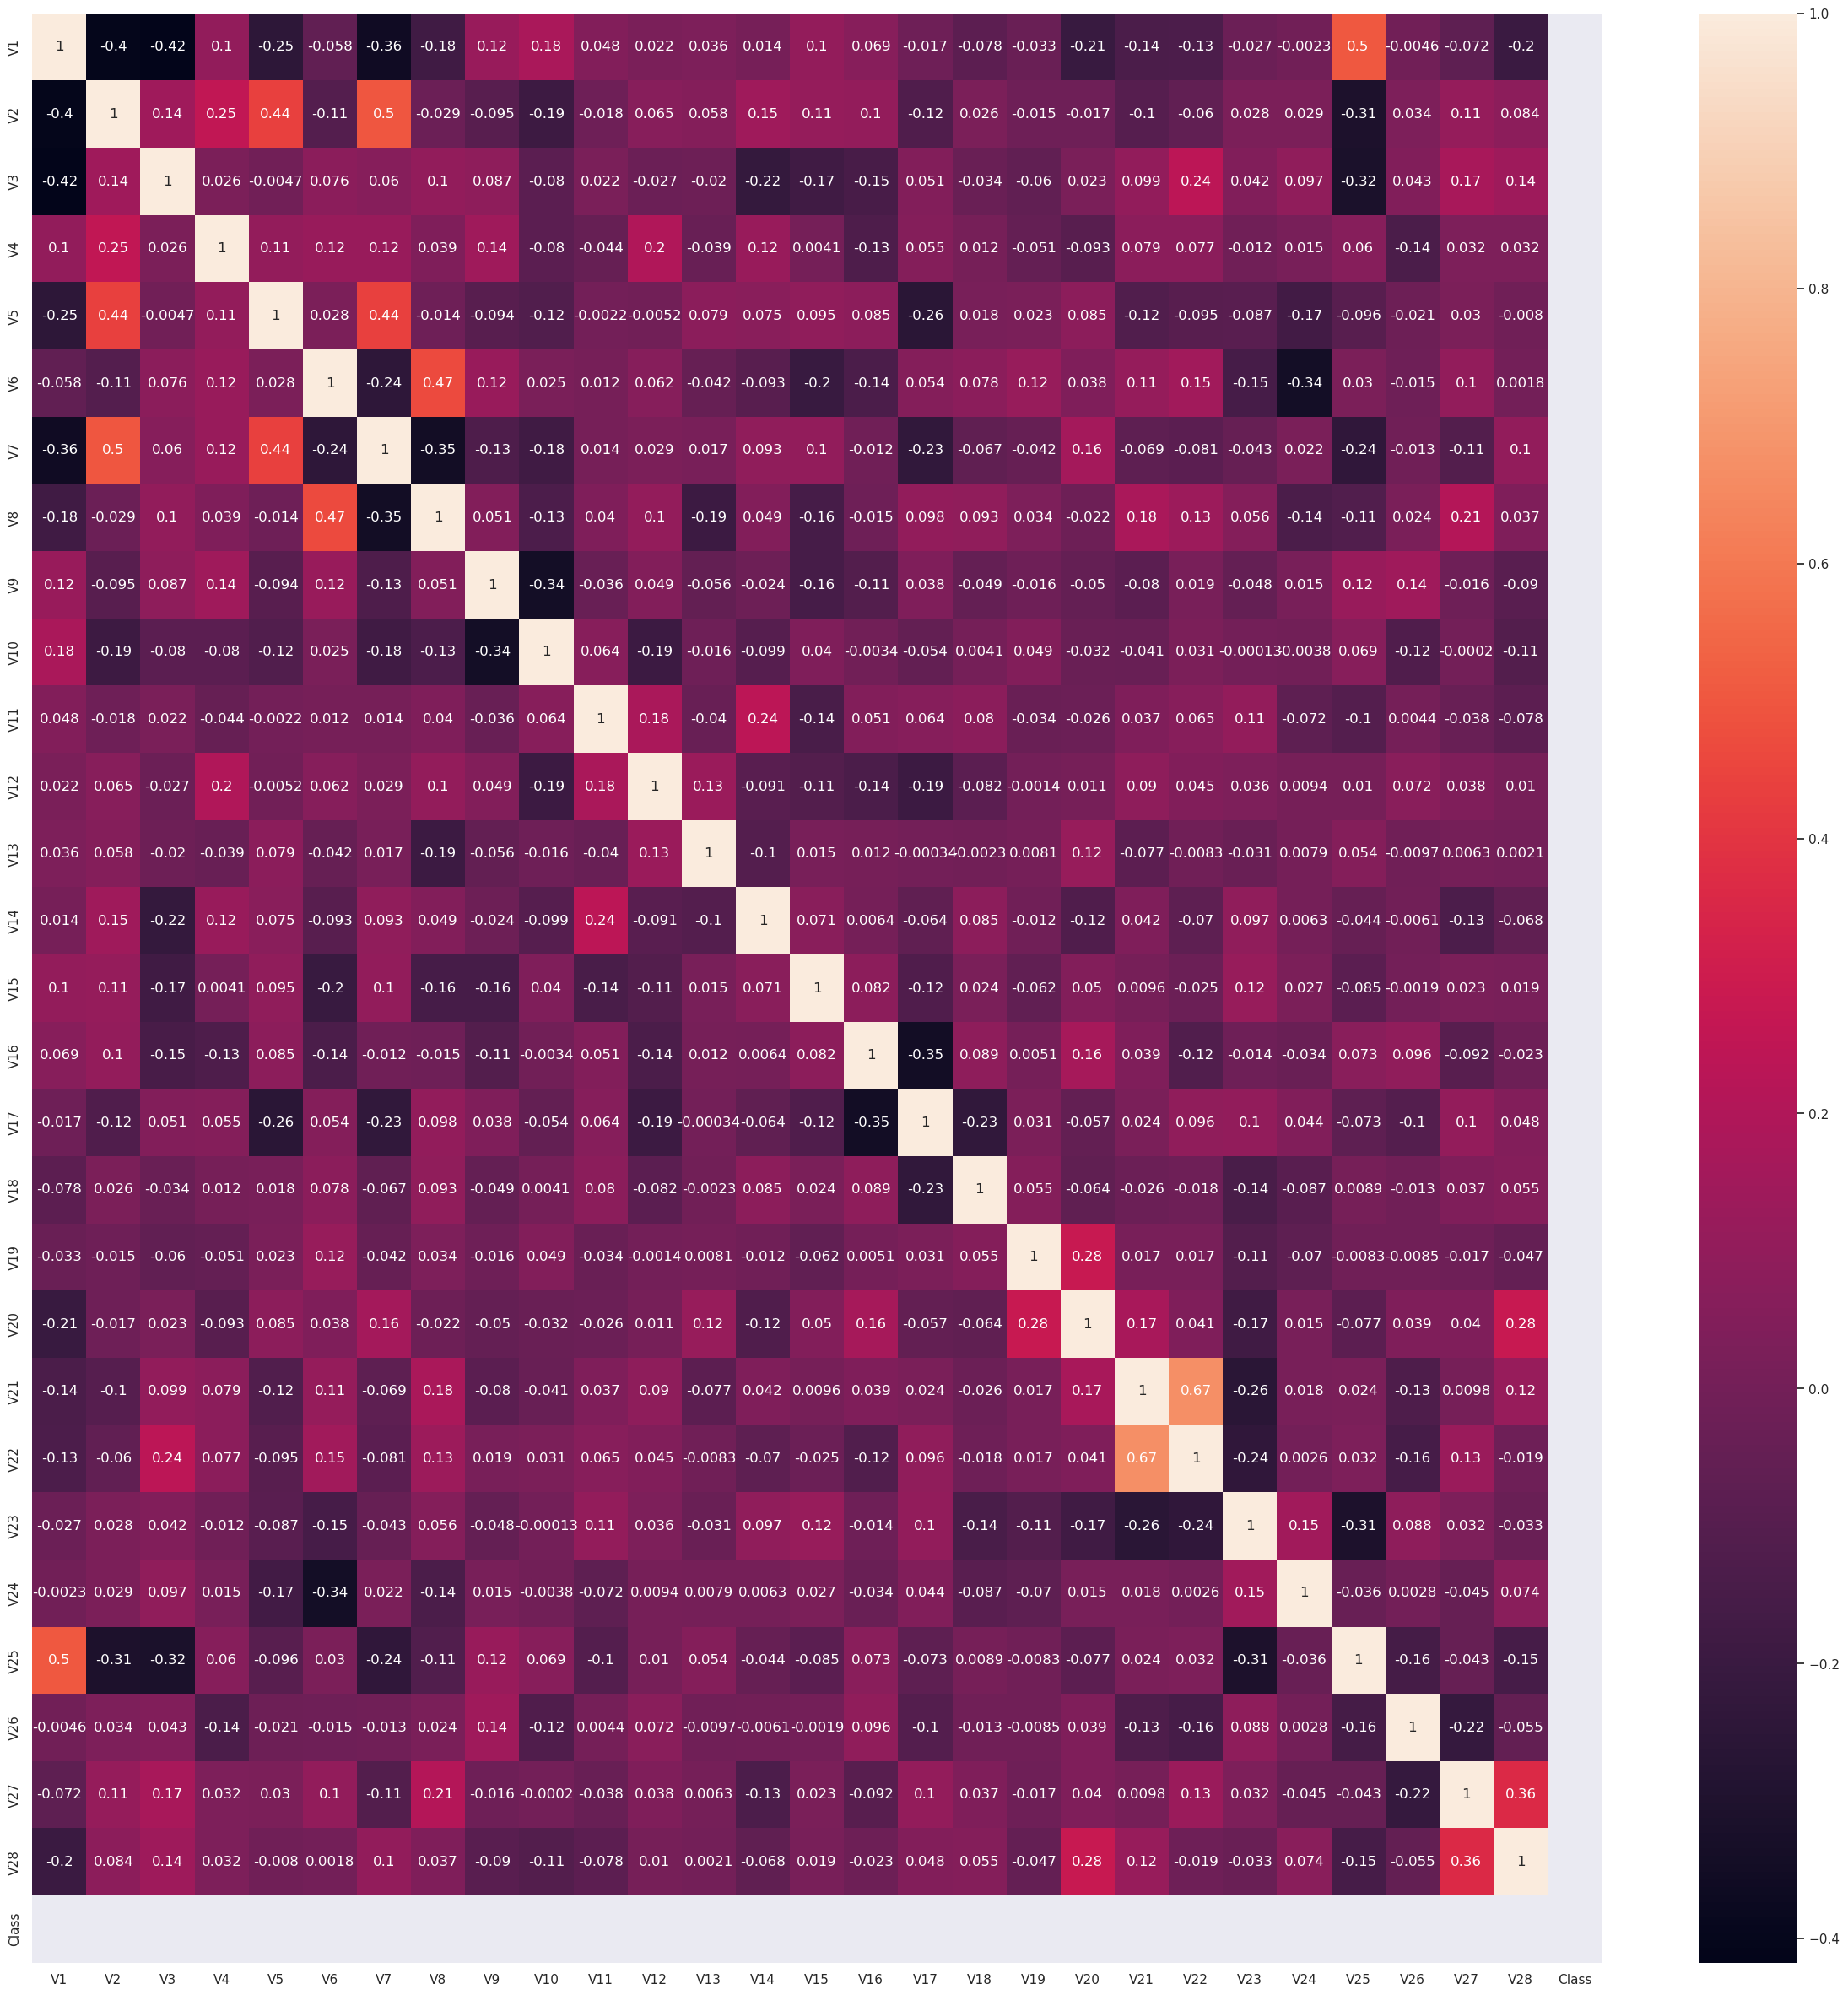

In [12]:
plt.figure(figsize=(30, 30))
sns.heatmap(df.corr(), annot = True)
plt.show()